<a href="https://colab.research.google.com/github/PhanDuyNhat/AI/blob/Code_AI/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=627763ad47de2d5b23ffb6fdb77d0e53563923151b814ccc0d00cc9be75ada9f
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


<ipython-input-8-bbe7864a2960>:76: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
<ipython-input-8-bbe7864a2960>:77: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
<ipython-input-8-bbe7864a2960>:78: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)


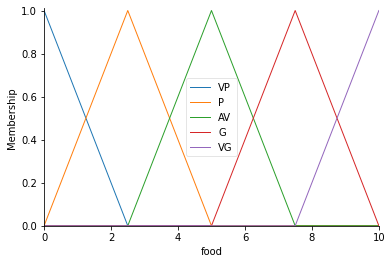

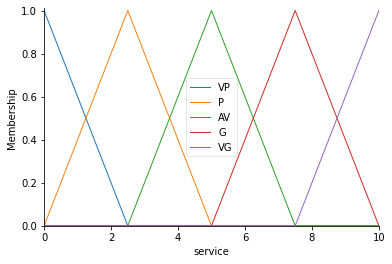

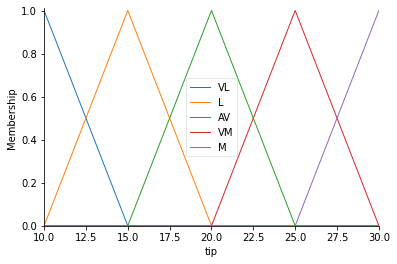

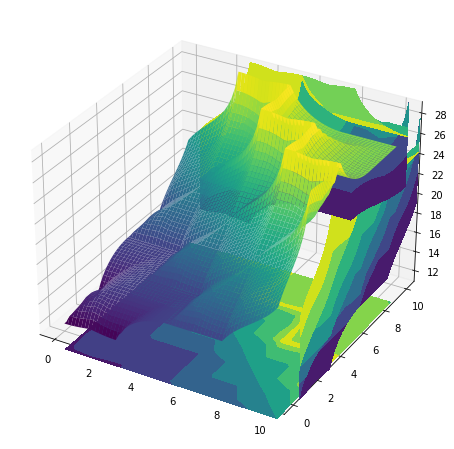

In [8]:

from IPython.utils.process import system
from matplotlib.pyplot import triplot
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from mpl_toolkits.mplot3d import axis3d
import matplotlib.pyplot as plt

universe = np.linspace(0, 10, 61)     
universe1 = np.linspace(10, 30, 61)
food = ctrl.Antecedent(universe, 'food')
service = ctrl.Antecedent(universe, 'service')
tip = ctrl.Consequent(universe1, 'tip')
name1 = ['VP', 'P', 'AV', 'G', 'VG']     
name2= ['VL', 'L', 'AV', 'VM', 'M'] 

service.automf(names = name1)
food.automf(names = name1)
tip.automf(names = name2)


rule0 = ctrl.Rule(antecedent = ((food['VP'] & service['VP'])| 
                                (food['P'] & service['VP'])| 
                                (food['VP'] & service['P'])), 
                                consequent = tip['VL'], label = 'rule VP')

rule1 = ctrl.Rule(antecedent = ((food['VP'] & service['AV'])|
                                (food['VP'] & service['G'])|
                                (food['G'] & service['VP'])| 
                                (food['P'] & service['P'])| 
                                (food['P'] & service['AV'])|
                                (food['AV'] & service['VP'])|
                                (food['AV'] & service['P'])), 
                                consequent = tip['L'], label = 'rule P')

rule2 = ctrl.Rule(antecedent = ((food['VP'] & service['VG'])| 
                                (food['P'] & service['G'])| 
                                (food['AV'] & service['AV'])|
                                (food['G'] & service['P'])|
                                (food['VG'] & service['VP'])), 
                                consequent = tip['AV'], label = 'rule AV')

rule3 = ctrl.Rule(antecedent = ((food['P'] & service['VG'])| 
                                (food['AV'] & service['G'])| 
                                (food['AV'] & service['VG'])|
                                (food['G'] & service['AV'])|
                                (food['G'] & service['G'])|
                                (food['VG'] & service['P'])|
                                (food['VG'] & service['AV'])), 
                                consequent = tip['M'], label = 'rule M')

rule4 = ctrl.Rule(antecedent = ((food['G'] & service['VG'])| 
                                (food['VG'] & service['G'])| 
                                (food['VG'] & service['VG'])), 
                                consequent = tip['VM'], label = 'rule VG')
     
food.view()
service.view()
tip.view()
system = ctrl.ControlSystem([rule0, rule1, rule2, rule3, rule4])
sim = ctrl.ControlSystemSimulation(system, flush_after_run = 61 * 61 + 1)
upsampled = np.linspace(0, 10, 61)
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)
for i in range(61):
  for j in range(61):
    sim.input['food'] = x[i, j]
    sim.input['service'] = y[i, j]
    sim.compute()
    z[i, j] = sim.output['tip']

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection = '3d')
suf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis',
                      linewidth = 0.4, antialiased = True)
cset = ax.contourf(x, y, z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)
ax.view_init(30, 300)




                                
              